# Lab 6
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

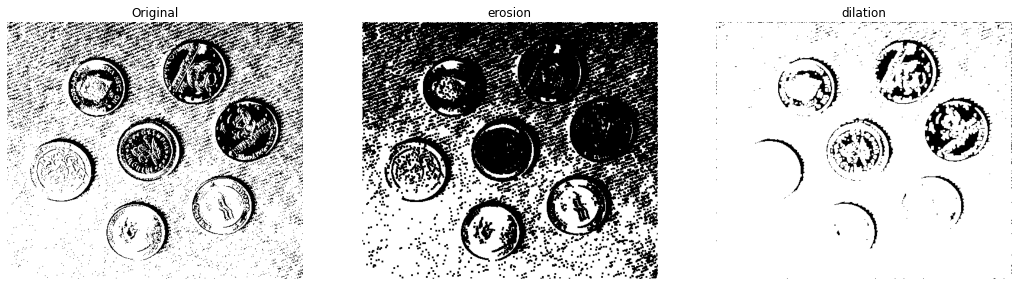

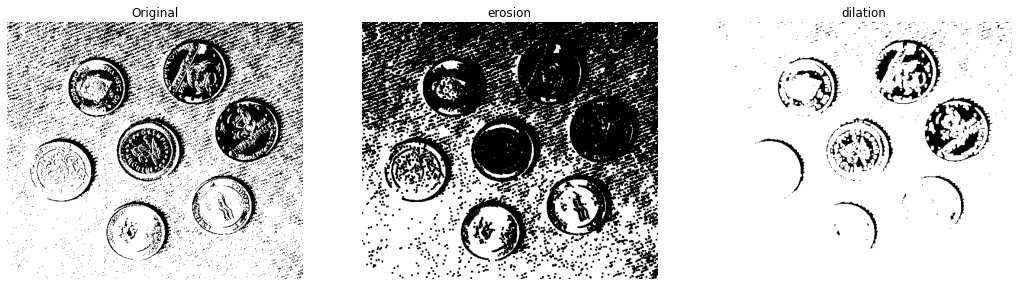

In [18]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
coin = rgb2gray(io.imread("img/coins.jpg"))
TRHD = 0.5
coin[coin<TRHD] = 0
coin[coin>=TRHD] = 1

def erosionConv(img,rowsSE,colSE):
    window = np.ones((rowsSE,colSE))
    erosionImg = np.copy(img)
    
    for i in range(int(rowsSE/2),img.shape[0]-int(rowsSE/2)):
        for j in range(int(colSE/2),img.shape[1]-int(colSE/2)):
            erosionImg[i][j] = np.min(img[i-int(rowsSE/2):i+int(rowsSE/2)+1,j-int(colSE/2):j+int(colSE/2)+1])
    return erosionImg

def dilationConv(img,rowSE,colSE):
    window = np.ones((rowSE,colSE))
    dilationImg = np.copy(img)
    
    for i in range(int(rowSE/2),img.shape[0]-int(rowSE/2)):
        for j in range(int(colSE/2),img.shape[1]-int(colSE/2)):
            dilationImg[i,j] = np.max(img[i-int(rowSE/2):i+int(rowSE/2)+1,j-int(colSE/2):j+int(colSE/2)+1])
    return dilationImg

SE = [[1,1,1],[1,1,1],[1,1,1]]

show_images([coin,(erosionConv(coin,3,3)),(dilationConv(coin,3,3))],['Original','erosion','dilation'])
show_images([coin,binary_erosion(coin,footprint=SE),binary_dilation(coin,footprint=SE)],['Original','erosion','dilation'])


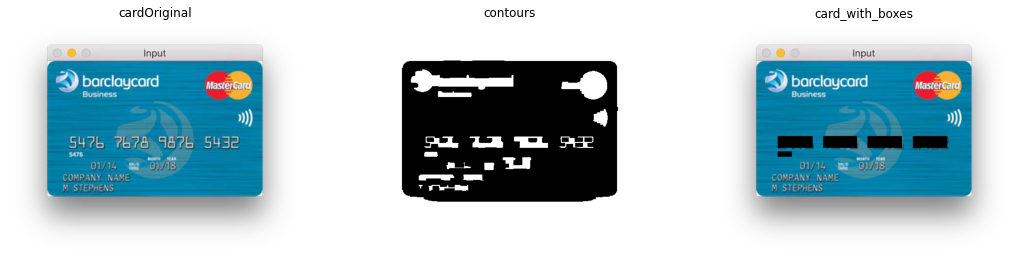

In [21]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
card = rgb2gray(io.imread('img/card.jpg'))
cardOrg = io.imread('img/card.jpg')
TRHD = 0.6
card[card<TRHD] = 0
card[card>=TRHD] = 1
rowSE, colSE = 7,12
closingCard = erosionConv(dilationConv(card,rowSE,colSE),rowSE,colSE)

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
bounding_boxes = find_contours(closingCard,.8)
img_with_boxes = np.copy(cardOrg)
for box in bounding_boxes:
    Xmin = int(min(box[:,1]))
    Xmax = int(max(box[:,1]))
    Ymin = int(min(box[:,0]))
    Ymax = int(max(box[:,0]))
    #CHECK FOR ASPECT RATIO to identify numbers boxes
    aspectRatio = (Xmax-Xmin)/(Ymax-Ymin)
    if aspectRatio > 2.5 and aspectRatio < 3.5:
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_with_boxes.shape)
        img_with_boxes[rr, cc] = 1 #set color white
    
show_images([cardOrg,closingCard,img_with_boxes],["cardOriginal","contours","card_with_boxes"])

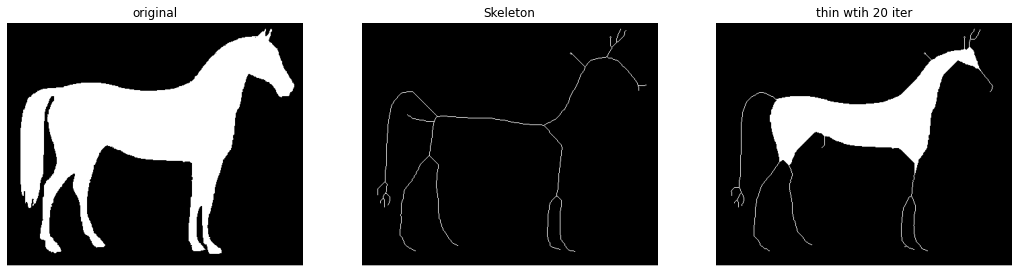

In [2]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
image = rgb2gray(io.imread("./img/horse.jpg"))
image[image<.9] = 0
image[image>=.9] = 1
show_images([image,skeletonize(image),thin(image, max_num_iter=20)],["original","Skeleton","thin wtih 20 iter"])